# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

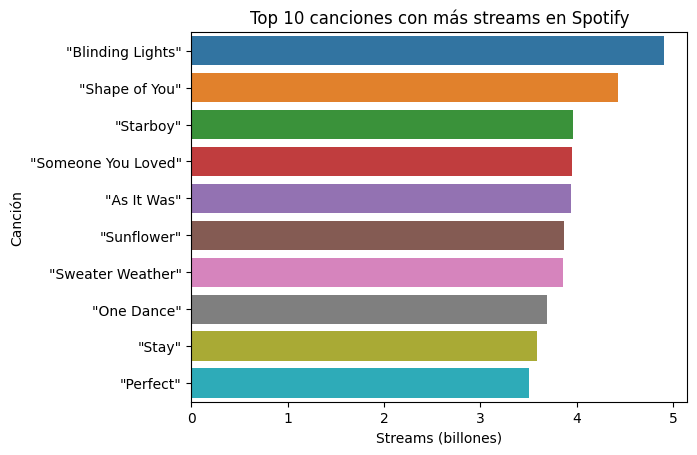

In [12]:
import os
import pandas as pd
from bs4 import BeautifulSoup
import requests
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import io

URL = "https://en.wikipedia.org/wiki/List_of_Spotify_streaming_records"
response = requests.get(URL)

if response.status_code == 200:
    html_io = io.StringIO(response.text)
    df_list = pd.read_html(html_io)
    df = df_list[0]

    df.rename(columns={'Streams (billions)': 'Streams'}, inplace=True)
    df['Streams'] = pd.to_numeric(df['Streams'], errors='coerce')

    top10 = df.sort_values('Streams', ascending=False).head(10)

    conn = sqlite3.connect("ejercicioscraping.db")
    cursor = conn.cursor()

    sql_crear_tabla = """
    CREATE TABLE IF NOT EXISTS spotify_wikipedia (
        rank INTEGER,
        song TEXT,
        artist TEXT,
        streams REAL,
        release_date TEXT
    );
    """
    cursor.execute(sql_crear_tabla)
    conn.commit()
    conn.close()

    sns.barplot(data=top10, y='Song', x='Streams', hue= "Song")
    plt.title('Top 10 canciones con más streams en Spotify')
    plt.xlabel('Streams (billones)')
    plt.ylabel('Canción')
    plt.show()

